In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
weapon_data = \
{
    'AWM': [0.57, 86.08, 0, 114.48],
    'M24': [0.32, 85.94, 0, 106.49],
    'AUG': [0.84, 85.05, 0, 32.6],
    'Groza' :[0.86, 82.2, 0, 30.66],
    'M249': [0.86, 80.83, 0, 39.41],
    'Kar98K': [0.27, 79.38, 0.92, 102.49],
    'Mk14': [0.63, 77.47, 0, 104.58],
    'P18C': [0.04, 75.88, 1.26, 7.92],
    'M416': [0.69, 74.6, 1.95, 25.3],
    'Sawed-off': [0.07, 69.96, 4.8, 4.34],
    'SLR': [0.39, 67.26, 0, 96.64],
    'SKS': [0.34, 65.92, 0.93, 92.33],
    'R1895': [0.05, 64.4, 1.84, 11.34],
    'P92': [0.09, 63.53, 18.56, 7.82],
    'P1911': [0.1, 61.84, 19.16, 7.76],
    'SCAR-L': [0.61,61.69, 1.92, 31.71],
    'R45': [0.07, 60.27, 4.74, 10.36],
    'QBZ': [0.68, 59.78, 0, 22.07],
    'QBU': [0.32, 55.75, 0, 81.1],
    'Mini14': [0.34, 55.12, 1.21, 82.05],
    'AKM': [0.63, 53.57, 3.9, 22.24],
    'VSS': [0.37, 47.51, 0.29, 51.97],
    'Vector': [0.49, 44.71, 0.77, 12.22],
    'UMP9': [0.60, 43.99, 3.92, 15.23],
    'DP-28': [0.63, 42.75, 0.19, 25.71],
    'S12K': [0.44, 37.72, 2.07, 5.55],
    'S686': [0.34, 37.05, 4.87, 5.7],
    'M16A4': [0.45, 35.34, 4.67, 33.23],
    'Tommy Gun': [0.62, 35.23, 1.65, 10.67],
    'Crossbow': [0.13, 35.06, 1.76, 25],
    'Micro UZI': [0.49, 33.98, 4.68, 8.47],
    'S1897': [0.38, 33.74, 9.43, 5.73]    
}

In [3]:
weapons = pd.DataFrame(data=weapon_data).transpose()

In [4]:
weapons.columns = ['KD', 'Preference', 'Spawn_rate', 'Avg_kill_distance']
weapons

,KD,Preference,Spawn_rate,Avg_kill_distance
AKM,0.63,53.57,3.90,22.24
AUG,0.84,85.05,0.00,32.60
AWM,0.57,86.08,0.00,114.48
Crossbow,0.13,35.06,1.76,25.00
DP-28,0.63,42.75,0.19,25.71
Groza,0.86,82.20,0.00,30.66
Kar98K,0.27,79.38,0.92,102.49
M16A4,0.45,35.34,4.67,33.23
M24,0.32,85.94,0.00,106.49
M249,0.86,80.83,0.00,39.41


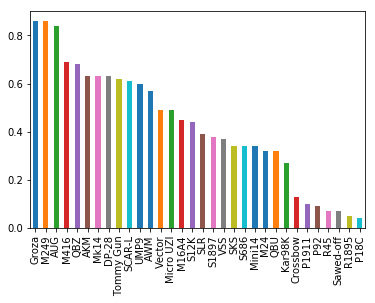

In [6]:
plt.figure()
weapons.sort_values(by='KD', ascending=False).KD.plot(kind='bar')
plt.show()

In [24]:
x = weapons.KD.sort_values(ascending=False).values.reshape(-1,1)
KD_kmeans = KMeans(n_clusters=4, random_state=0).fit(x)
KD_kmeans.labels_

array([2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

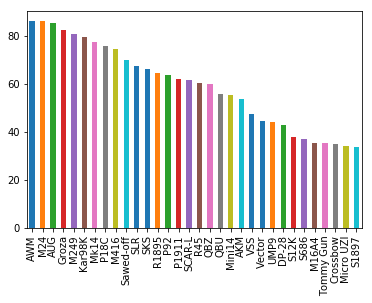

In [7]:
weapons.sort_values(by='Preference', ascending=False).Preference.plot(kind='bar')
plt.show()

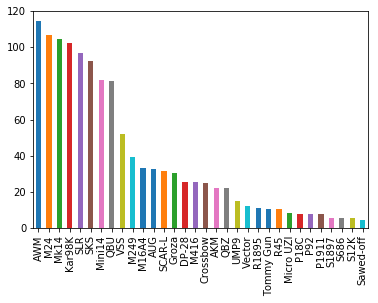

In [8]:
weapons.sort_values(by='Avg_kill_distance', ascending=False).Avg_kill_distance.plot(kind='bar')
plt.show()

In [35]:
def define_range_type(distance):
    if distance > 50:
        return 'long'
    elif distance > 20:
        return 'middle'
    else:
        return 'short'

In [37]:
weapons['range'] = weapons['Avg_kill_distance'].apply(define_weapon_type)
weapons

,KD,Preference,Spawn_rate,Avg_kill_distance,KD_rank,Preference_rank,range
AKM,0.63,53.57,3.90,22.24,6,21,middle
AUG,0.84,85.05,0.00,32.60,3,3,middle
AWM,0.57,86.08,0.00,114.48,12,1,long
Crossbow,0.13,35.06,1.76,25.00,26,30,middle
DP-28,0.63,42.75,0.19,25.71,6,25,middle
Groza,0.86,82.20,0.00,30.66,1,4,middle
Kar98K,0.27,79.38,0.92,102.49,25,6,long
M16A4,0.45,35.34,4.67,33.23,15,28,middle
M24,0.32,85.94,0.00,106.49,23,2,long
M249,0.86,80.83,0.00,39.41,1,5,middle


In [53]:
weapons['KD_rank'] = weapons.KD.rank(method='min',ascending=False).astype(int)
weapons['Preference_rank'] = weapons.Preference.rank(method='min',ascending=False).astype(int)
weapons.sort_values(by='KD_rank').ix[15:,['KD_rank', 'Preference_rank']]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


,KD_rank,Preference_rank
S12K,16,26
SLR,17,11
S1897,18,32
VSS,19,22
Mini14,20,20
S686,20,27
SKS,20,12
M24,23,2
QBU,23,19
Kar98K,25,6


In [47]:
weapons['grouped_KD_rank'] = weapons.groupby('range').KD.rank(method='min',ascending=False).astype(int)
weapons['grouped_Preference_rank'] = weapons.groupby('range').Preference.rank(method='min',ascending=False).astype(int)
weapons['KD_Pre_diff'] = weapons['KD_rank'] - weapons['Preference_rank']
weapons['grouped_KD_Pre_diff'] = weapons['grouped_KD_rank'] - weapons['grouped_Preference_rank']
weapons.sort_values(by=['range','grouped_KD_rank'],ascending=True).iloc[:,4:]

,KD_rank,Preference_rank,range,grouped_KD_rank,grouped_Preference_rank,KD_Pre_diff,grouped_KD_Pre_diff
Mk14,6,7,long,1,4,-1,-3
AWM,12,1,long,2,1,11,1
SLR,17,11,long,3,5,6,-2
VSS,19,22,long,4,9,-3,-5
Mini14,20,20,long,5,8,0,-3
SKS,20,12,long,5,6,8,-1
M24,23,2,long,7,2,21,5
QBU,23,19,long,7,7,4,0
Kar98K,25,6,long,9,3,19,6
Groza,1,4,middle,1,2,-3,-1


In [61]:
weapons[weapons.range=='long'].loc[:,['grouped_KD_rank', 'grouped_Preference_rank', 'grouped_KD_Pre_diff']].sort_values(by='grouped_KD_Pre_diff')

,grouped_KD_rank,grouped_Preference_rank,grouped_KD_Pre_diff
VSS,4,9,-5
Mini14,5,8,-3
Mk14,1,4,-3
SLR,3,5,-2
SKS,5,6,-1
QBU,7,7,0
AWM,2,1,1
M24,7,2,5
Kar98K,9,3,6


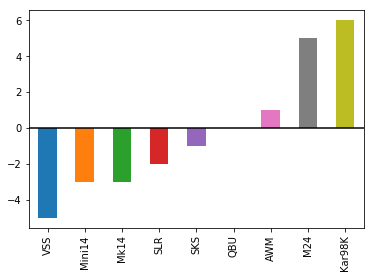

In [80]:
plt.figure()
weapons[weapons.range=='long'].sort_values(by='grouped_KD_Pre_diff').grouped_KD_Pre_diff.plot(kind='bar')
plt.axhline(0, color='k')
# weapons[weapons.range=='middle'].sort_values(by='grouped_KD_Pre_diff').grouped_KD_Pre_diff.plot(kind='bar')
# weapons[weapons.range=='short'].sort_values(by='grouped_KD_Pre_diff', ascending=True).grouped_KD_Pre_diff.plot(kind='bar')
plt.show()